# Coincap example

Crypto Currency Arbitrage Trading Back Testing within Coincap.

This document discribed how to get data from coincap to analyze arbitrage opportunity.

## 1. random get data from coincap

In [1]:
# get random data of Okex Binance Huobi Gate

import requests, time

okexFile = open("../data/coincap_candles_m1_random/BTC/coincap_candles_okex_bitcoin_m1_random.json","w+")
binanceFile = open("../data/coincap_candles_m1_random/BTC/coincap_candles_binance_bitcoin_m1_random.json","w+")
huobiFile = open("../data/coincap_candles_m1_random/BTC/coincap_candles_huobi_bitcoin_m1_random.json","w+")
gateFile = open("../data/coincap_candles_m1_random/BTC/coincap_candles_gate_bitcoin_m1_random.json","w+")

url = "https://api.coincap.io/v2/candles"

start = "2018-11-1 00:00:00, 0"
end = "2018-11-2 00:00:00, 0"

startTimeArray = time.strptime(start, "%Y-%m-%d %H:%M:%S, %f")
endTimeArray = time.strptime(end, "%Y-%m-%d %H:%M:%S, %f")
startTimeStamp = int(time.mktime(startTimeArray)*1000)
endTimeStamp = int(time.mktime(endTimeArray)*1000)

okexQuerystring = {"exchange":"okex","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}
binanceQuerystring = {"exchange":"binance","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}
huobiQuerystring = {"exchange":"huobi","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}
gateQuerystring = {"exchange":"gate","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}

okexResponse = requests.request("GET", url, params=okexQuerystring)
binanceResponse = requests.request("GET", url, params=binanceQuerystring)
huobiResponse = requests.request("GET", url, params=huobiQuerystring)
gateResponse = requests.request("GET", url, params=gateQuerystring)

okexFile.write(okexResponse.text)
binanceFile.write(binanceResponse.text)
huobiFile.write(huobiResponse.text)
gateFile.write(gateResponse.text)

okexFile.close
binanceFile.close
huobiFile.close
gateFile.close

<function TextIOWrapper.close()>

# 2. analyze arbitrage opportunity 

In [2]:
# read random data of Okex Binance Huobi Gate
import talib
import datetime
import numpy as np
import pandas as pd
import mpl_finance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as dates

okexJsonFile = "../data/coincap_candles_m1_random/BTC/coincap_candles_okex_bitcoin_m1_random.json"
binanceJsonFile = "../data/coincap_candles_m1_random/BTC/coincap_candles_binance_bitcoin_m1_random.json"
huobiJsonFile = "../data/coincap_candles_m1_random/BTC/coincap_candles_huobi_bitcoin_m1_random.json"
gateJsonFile = "../data/coincap_candles_m1_random/BTC/coincap_candles_gate_bitcoin_m1_random.json"

okexJsonData = pd.read_json(okexJsonFile,orient='values',encoding='utf-8').data
binanceJsonData = pd.read_json(binanceJsonFile,orient='values',encoding='utf-8').data
huobiJsonData = pd.read_json(huobiJsonFile,orient='values',encoding='utf-8').data
gateJsonData = pd.read_json(gateJsonFile,orient='values',encoding='utf-8').data

okexQuotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))
binanceQuotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))
huobiQuotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))
gateQuotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))

for index in range(len(okexJsonData)):
    okexQuotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(okexJsonData[index]['period'])/1000)),
                         'open':float(okexJsonData[index]['open']), 'high':float(okexJsonData[index]['high']), 'low':float(okexJsonData[index]['low']),  
                        'close':float(okexJsonData[index]['close']), 'volume':float(okexJsonData[index]['volume'])}
for index in range(len(binanceJsonData)):
    binanceQuotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(binanceJsonData[index]['period'])/1000)),
                         'open':float(binanceJsonData[index]['open']), 'high':float(binanceJsonData[index]['high']), 'low':float(binanceJsonData[index]['low']),  
                        'close':float(binanceJsonData[index]['close']), 'volume':float(binanceJsonData[index]['volume'])}
for index in range(len(huobiJsonData)):
    huobiQuotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(huobiJsonData[index]['period'])/1000)),
                         'open':float(huobiJsonData[index]['open']), 'high':float(huobiJsonData[index]['high']), 'low':float(huobiJsonData[index]['low']),  
                        'close':float(huobiJsonData[index]['close']), 'volume':float(huobiJsonData[index]['volume'])}
for index in range(len(gateJsonData)):
    gateQuotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(gateJsonData[index]['period'])/1000)),
                         'open':float(gateJsonData[index]['open']), 'high':float(gateJsonData[index]['high']), 'low':float(gateJsonData[index]['low']),  
                        'close':float(gateJsonData[index]['close']), 'volume':float(gateJsonData[index]['volume'])}

print("okex 1m data length:", len(okexQuotes))
print("binance 1m data length:", len(binanceQuotes))
print("huobi 1m data length:", len(huobiQuotes))
print("gate 1m data length:", len(gateQuotes))

okex 1m data length: 178
binance 1m data length: 1440
huobi 1m data length: 1330
gate 1m data length: 996


<Figure size 432x288 with 0 Axes>

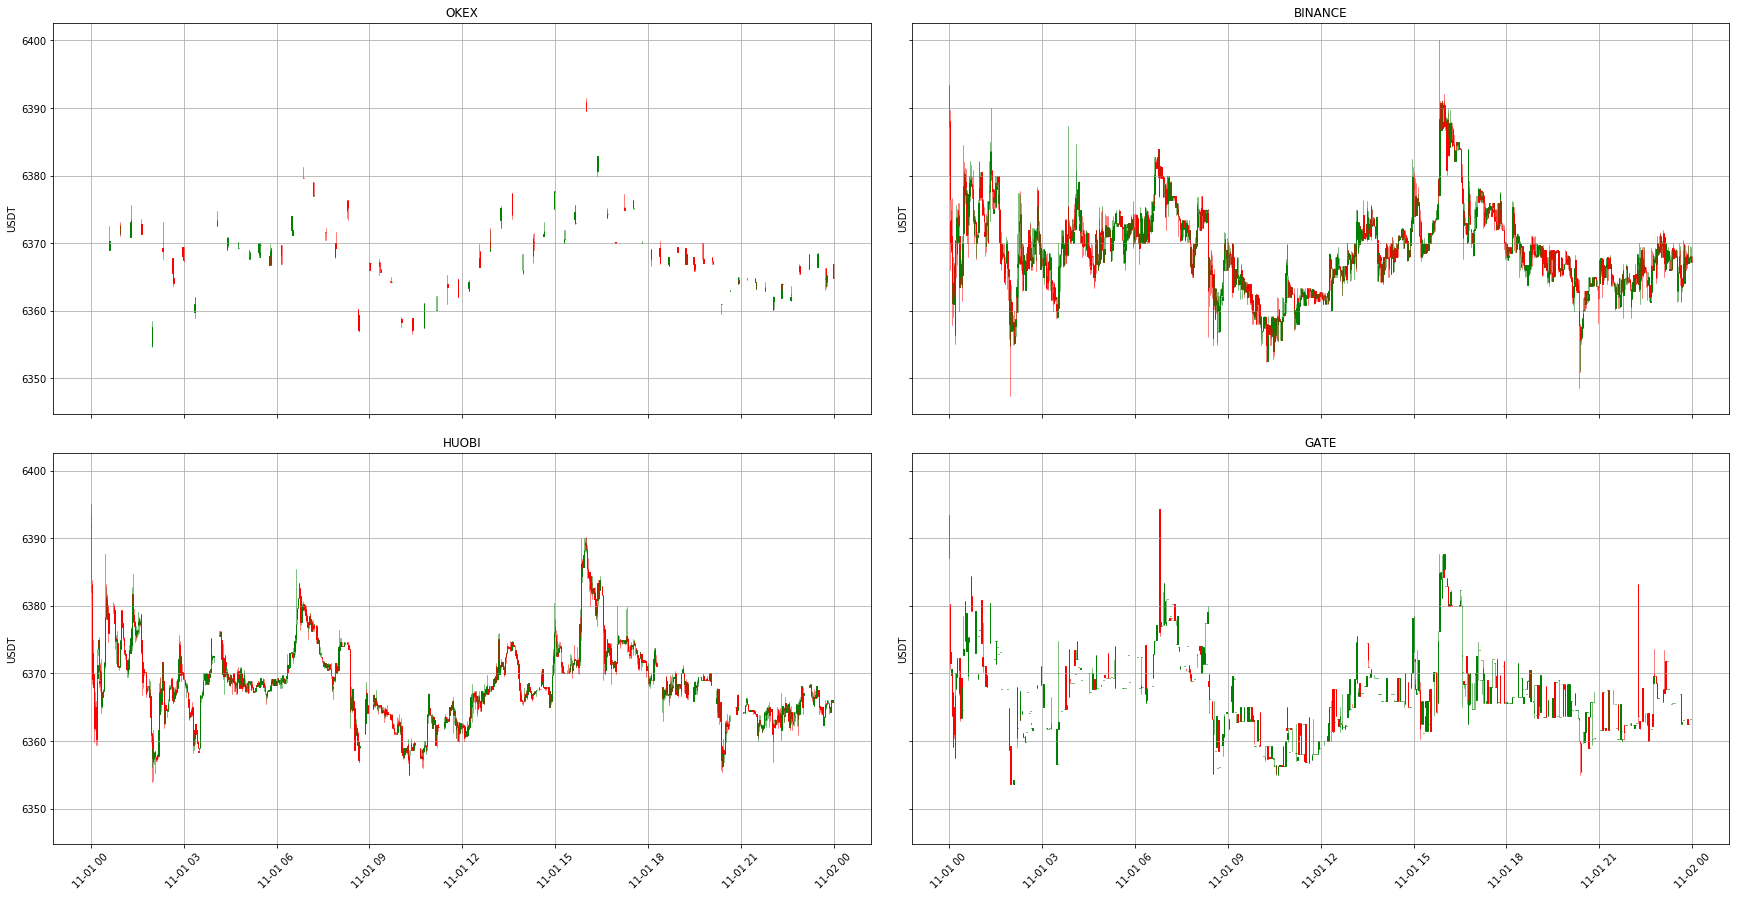

In [3]:
# draw random data of Okex Binance Huobi Gate
    
%matplotlib inline

plt.figure()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(24,12))
fig.tight_layout() #调整整体空白
plt.subplots_adjust(wspace =0.05, hspace =0.1) #调整子图间距

axs[0, 0].xaxis_date()
axs[0, 0].set_title("OKEX")
axs[0, 0].set_ylabel("USDT")
axs[0, 0].grid(True)
for tick in axs[0, 0].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[0, 0], np.array(okexQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')
    
axs[0, 1].xaxis_date()
axs[0, 1].set_title("BINANCE")
axs[0, 1].set_ylabel("USDT")
axs[0, 1].grid(True)
for tick in axs[0, 1].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[0, 1], np.array(binanceQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')

axs[1, 0].xaxis_date()
axs[1, 0].set_title("HUOBI")
axs[1, 0].set_ylabel("USDT")
axs[1, 0].grid(True)
for tick in axs[1, 0].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[1, 0], np.array(huobiQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')

axs[1, 1].xaxis_date()
axs[1, 1].set_title("GATE")
axs[1, 1].set_ylabel("USDT")
axs[1, 1].grid(True)
for tick in axs[1, 1].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[1, 1], np.array(gateQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')

plt.show()

<Figure size 432x288 with 0 Axes>

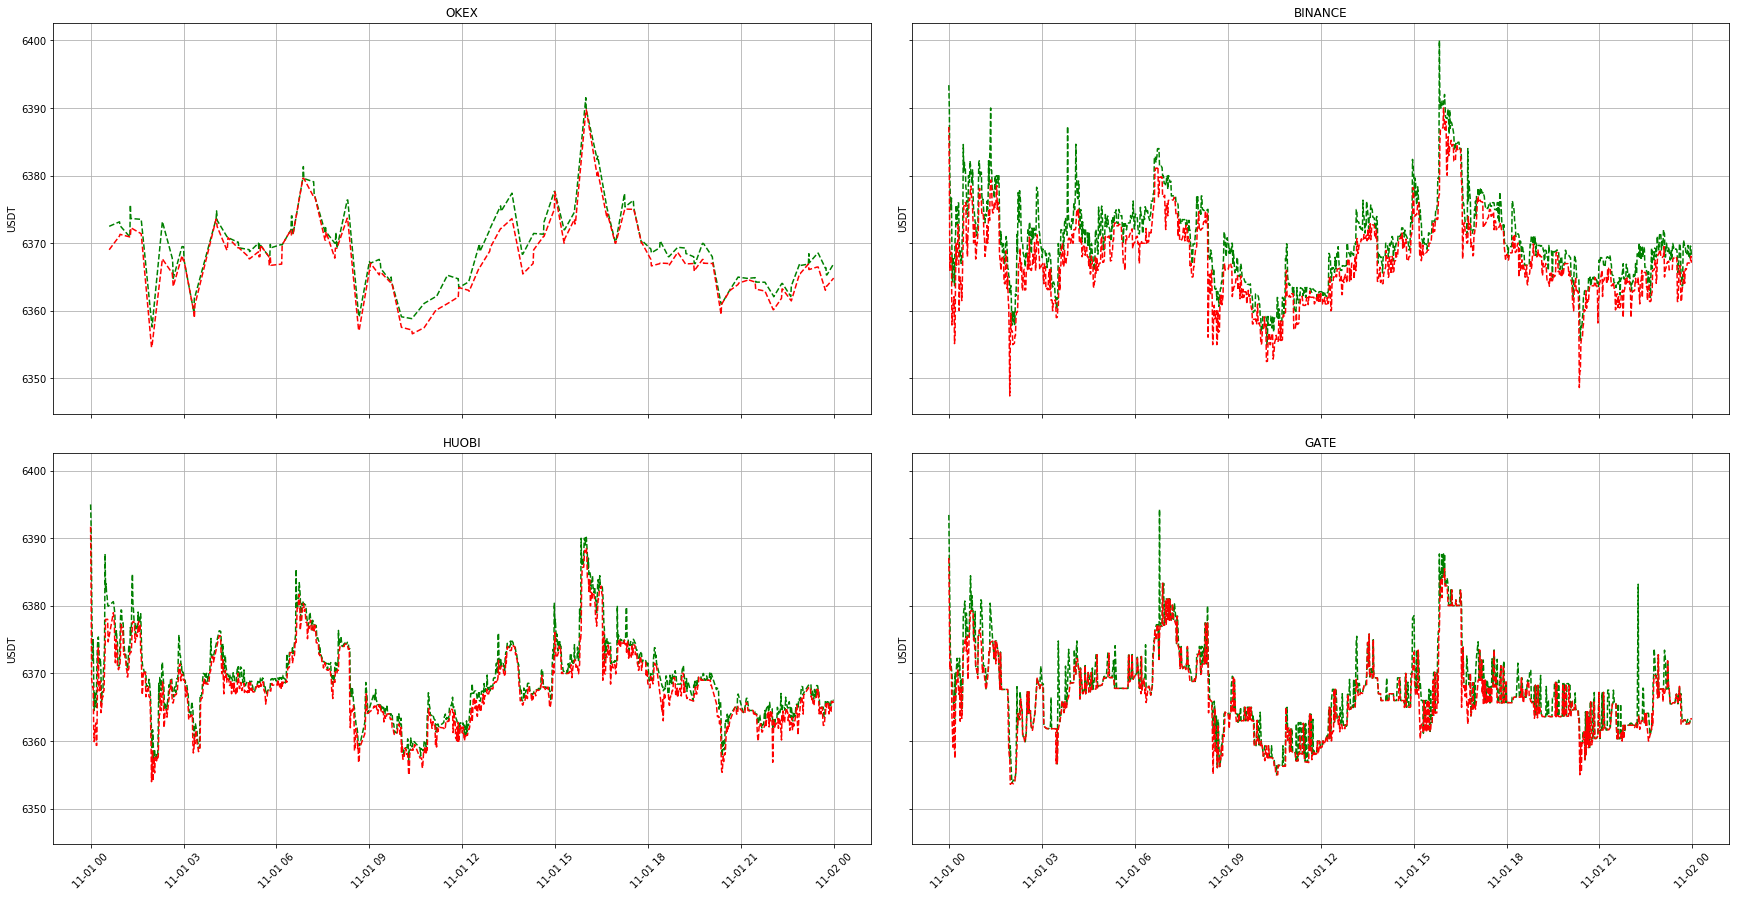

In [4]:
# draw random data of Okex Binance Huobi Gate
    
%matplotlib inline

plt.figure()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(24,12))
fig.tight_layout() #调整整体空白
plt.subplots_adjust(wspace =0.05, hspace =0.1) #调整子图间距

axs[0, 0].xaxis_date()
axs[0, 0].set_title("OKEX")
axs[0, 0].set_ylabel("USDT")
axs[0, 0].grid(True)
for tick in axs[0, 0].get_xticklabels():
    tick.set_rotation(45)
#mpf.candlestick_ohlc(axs[0, 0], np.array(okexQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
#                     width=0.0005, colorup='green', colordown='red')
axs[0, 0].plot(okexQuotes['period'], okexQuotes['high'], 'g--',  label='high')
axs[0, 0].plot(okexQuotes['period'], okexQuotes['low'], 'r--',  label='low')
    
axs[0, 1].xaxis_date()
axs[0, 1].set_title("BINANCE")
axs[0, 1].set_ylabel("USDT")
axs[0, 1].grid(True)
for tick in axs[0, 1].get_xticklabels():
    tick.set_rotation(45)
#mpf.candlestick_ohlc(axs[0, 1], np.array(binanceQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
#                     width=0.0005, colorup='green', colordown='red')
axs[0, 1].plot(binanceQuotes['period'], binanceQuotes['high'], 'g--',  label='high')
axs[0, 1].plot(binanceQuotes['period'], binanceQuotes['low'], 'r--',  label='low')

axs[1, 0].xaxis_date()
axs[1, 0].set_title("HUOBI")
axs[1, 0].set_ylabel("USDT")
axs[1, 0].grid(True)
for tick in axs[1, 0].get_xticklabels():
    tick.set_rotation(45)
#mpf.candlestick_ohlc(axs[1, 0], np.array(huobiQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
#                     width=0.0005, colorup='green', colordown='red')
axs[1, 0].plot(huobiQuotes['period'], huobiQuotes['high'], 'g--',  label='high')
axs[1, 0].plot(huobiQuotes['period'], huobiQuotes['low'], 'r--',  label='low')

axs[1, 1].xaxis_date()
axs[1, 1].set_title("GATE")
axs[1, 1].set_ylabel("USDT")
axs[1, 1].grid(True)
for tick in axs[1, 1].get_xticklabels():
    tick.set_rotation(45)
#mpf.candlestick_ohlc(axs[1, 1], np.array(gateQuotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
#                     width=0.0005, colorup='green', colordown='red')
axs[1, 1].plot(gateQuotes['period'], gateQuotes['high'], 'g--',  label='high')
axs[1, 1].plot(gateQuotes['period'], gateQuotes['low'], 'r--',  label='low')

plt.show()

In [5]:
# 二次抽样
# 数据缺失严重，以时间为准
okexQuotes.set_index(["period"], inplace=True)
binanceQuotes.set_index(["period"], inplace=True)
huobiQuotes.set_index(["period"], inplace=True)
gateQuotes.set_index(["period"], inplace=True)

# get the intersection
ixs = okexQuotes.index.intersection(binanceQuotes.index.intersection(
    huobiQuotes.index.intersection(gateQuotes.index)))

# check the intersection result
#for i in range(len(ixs)):
#    print(dates.num2date(ixs[i]).strftime("%Y-%m-%d %H:%M:%S"))

okexSample = okexQuotes.loc[ixs]
binanceSample = binanceQuotes.loc[ixs]
huobiSample = huobiQuotes.loc[ixs]
gateSample = gateQuotes.loc[ixs]

okexSample.reset_index(drop=False, inplace=True)
binanceSample.reset_index(drop=False, inplace=True)
huobiSample.reset_index(drop=False, inplace=True)
gateSample.reset_index(drop=False, inplace=True)


<Figure size 432x288 with 0 Axes>

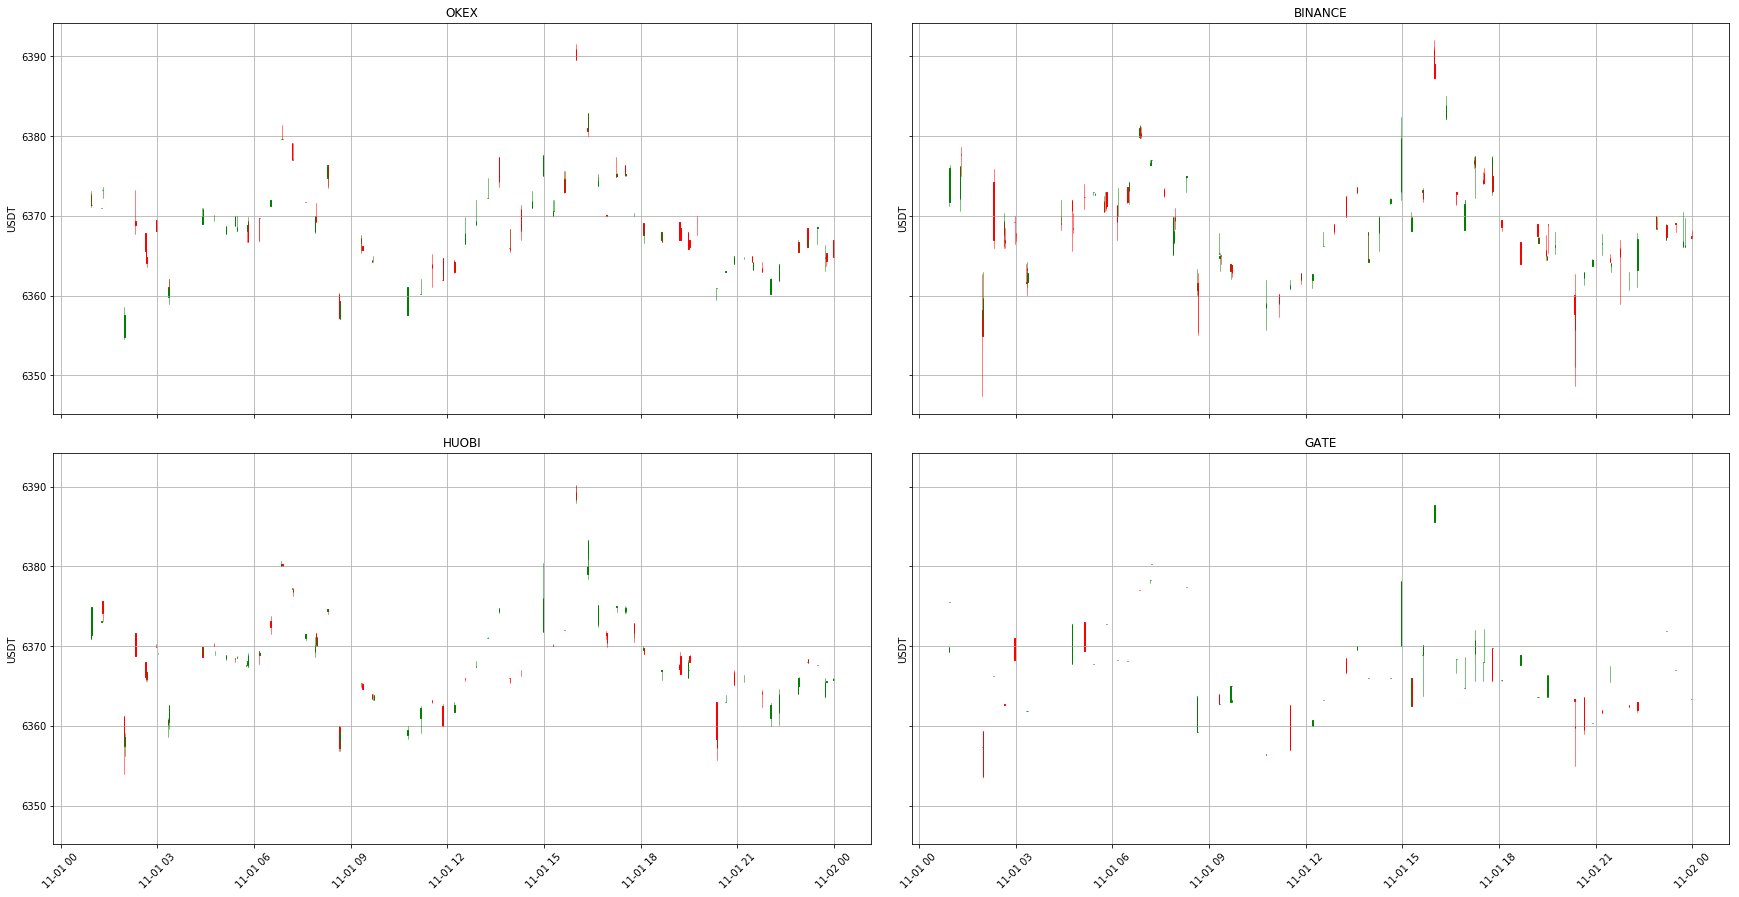

In [16]:
# draw random data of Okex Binance Huobi Gate  
%matplotlib inline

plt.figure()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(24,12))
fig.tight_layout() #调整整体空白
plt.subplots_adjust(wspace =0.05, hspace =0.1) #调整子图间距

axs[0, 0].xaxis_date()
axs[0, 0].set_title("OKEX")
axs[0, 0].set_ylabel("USDT")
axs[0, 0].grid(True)
for tick in axs[0, 0].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[0, 0], np.array(okexSample.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')
    
axs[0, 1].xaxis_date()
axs[0, 1].set_title("BINANCE")
axs[0, 1].set_ylabel("USDT")
axs[0, 1].grid(True)
for tick in axs[0, 1].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[0, 1], np.array(binanceSample.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')

axs[1, 0].xaxis_date()
axs[1, 0].set_title("HUOBI")
axs[1, 0].set_ylabel("USDT")
axs[1, 0].grid(True)
for tick in axs[1, 0].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[1, 0], np.array(huobiSample.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')

axs[1, 1].xaxis_date()
axs[1, 1].set_title("GATE")
axs[1, 1].set_ylabel("USDT")
axs[1, 1].grid(True)
for tick in axs[1, 1].get_xticklabels():
    tick.set_rotation(45)
mpf.candlestick_ohlc(axs[1, 1], np.array(gateSample.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')

plt.show()

<Figure size 432x288 with 0 Axes>

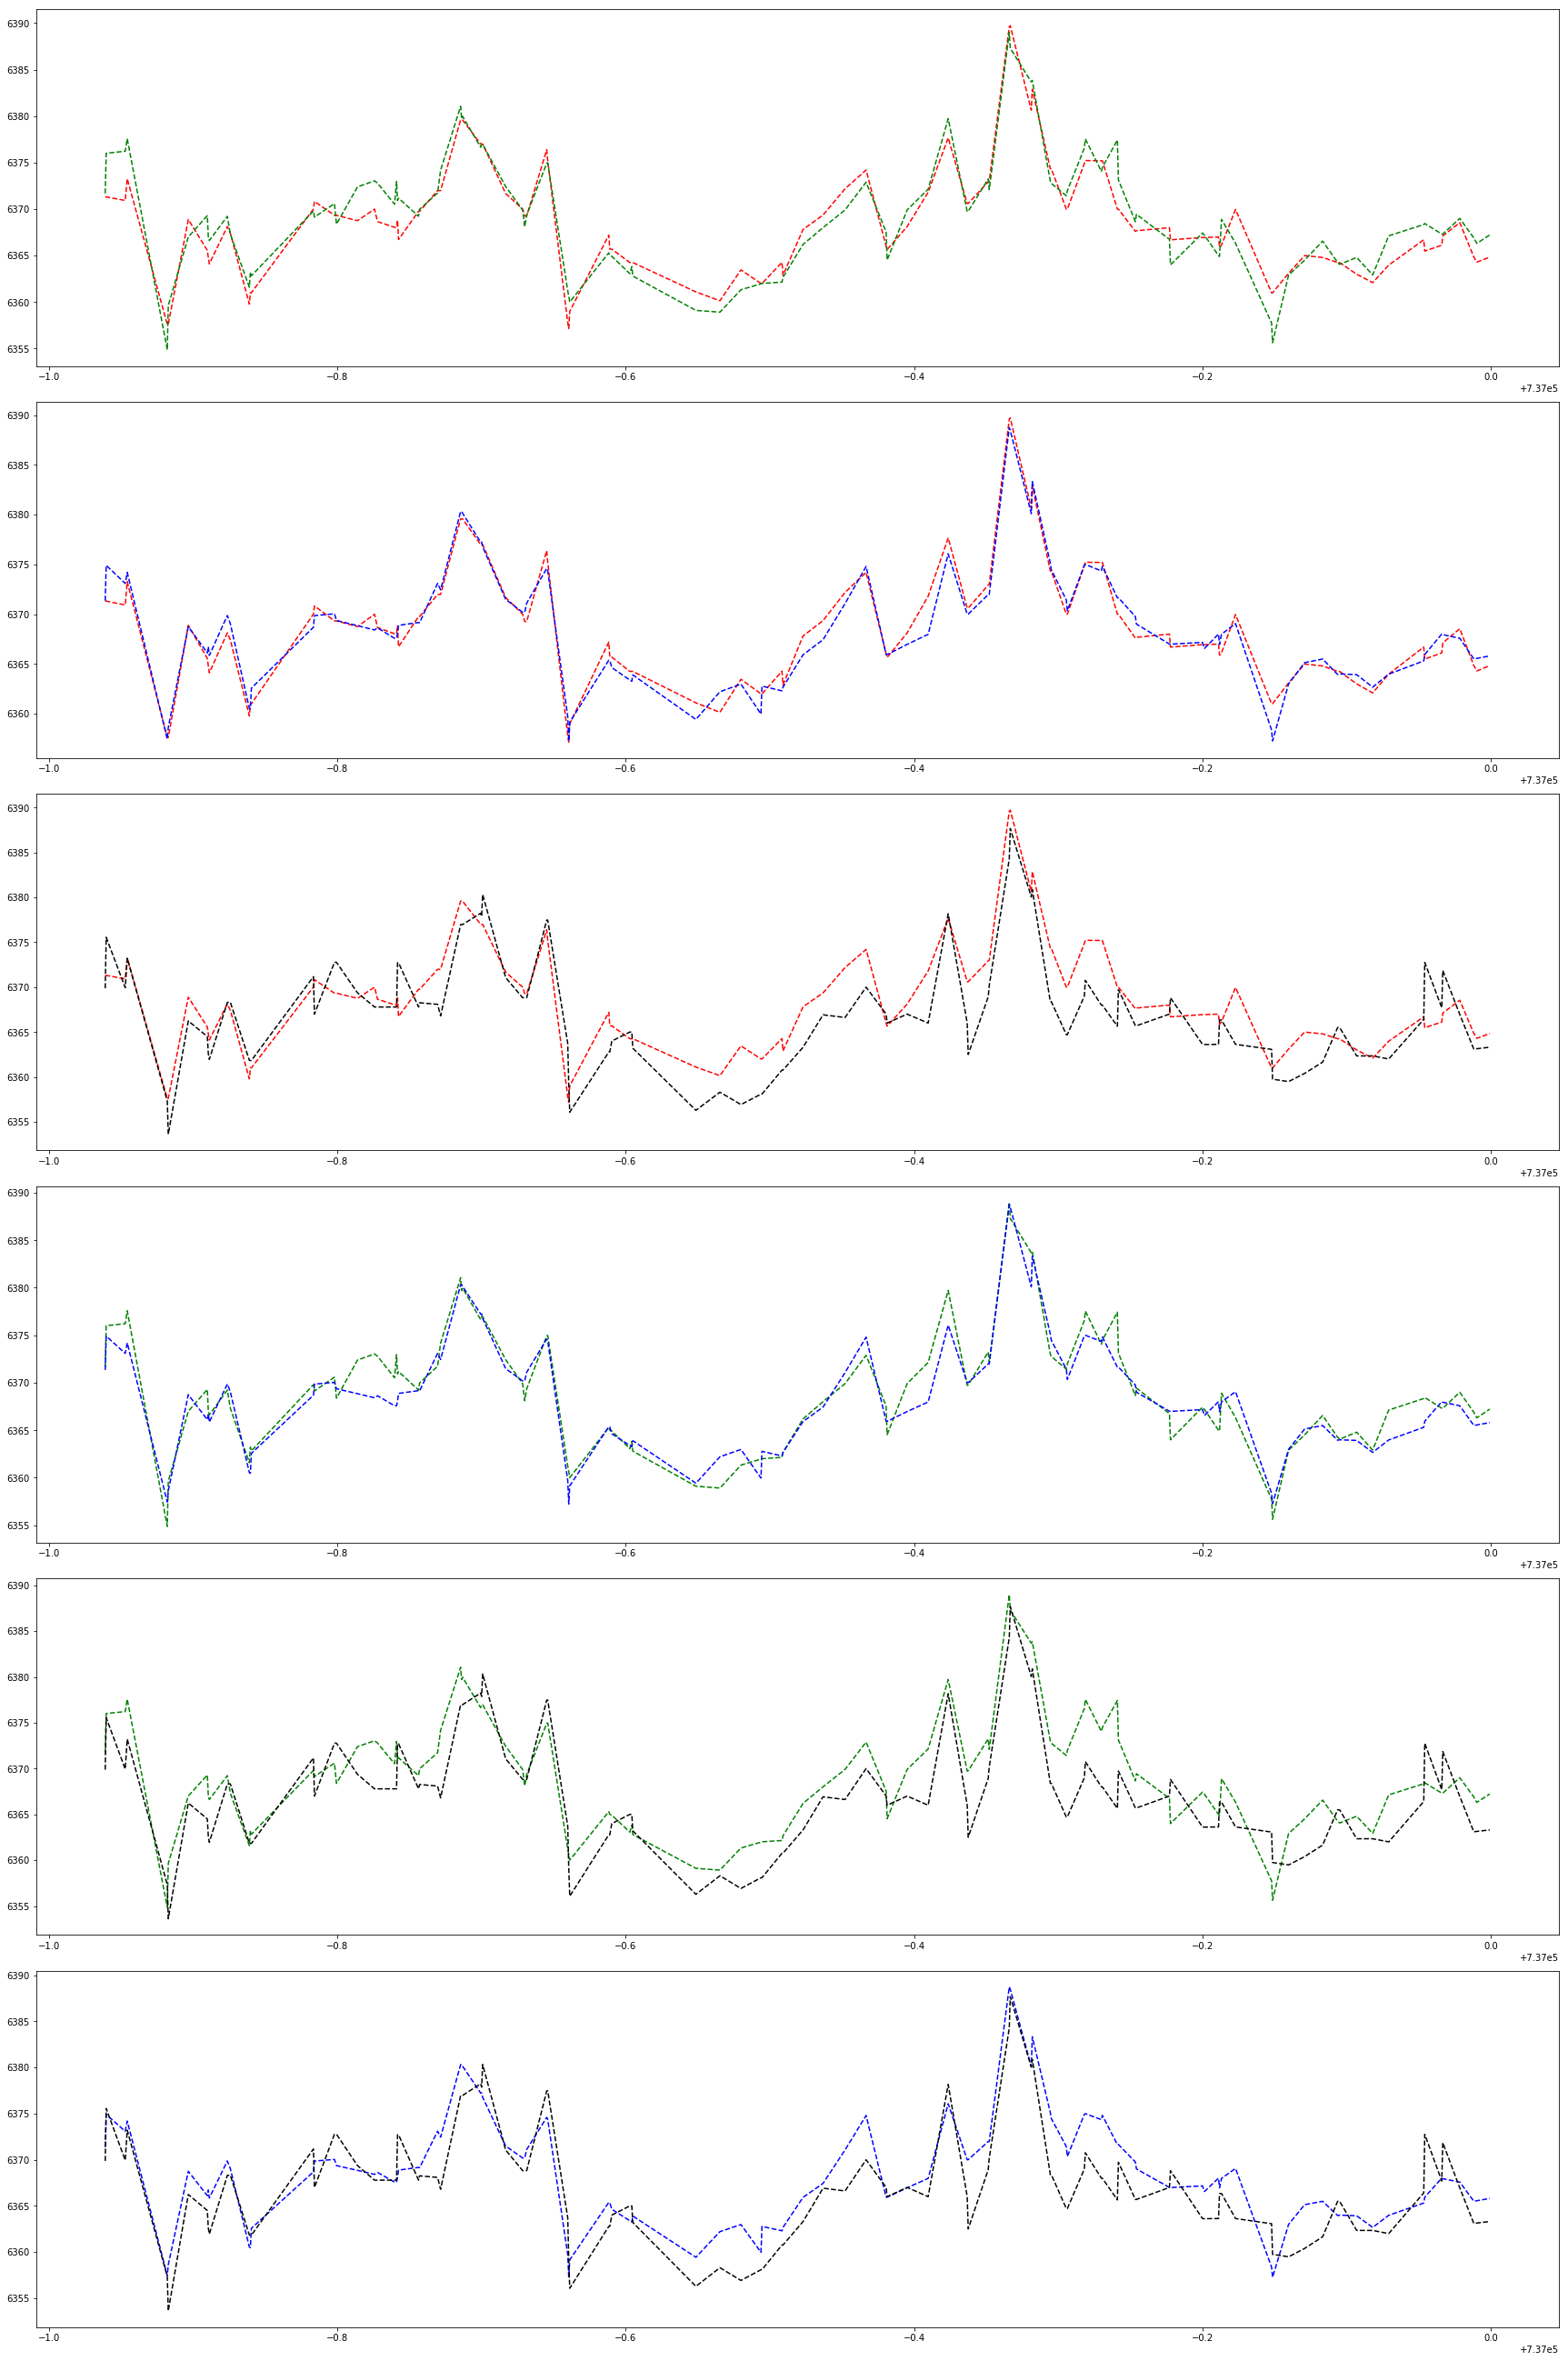

In [20]:
%matplotlib inline

plt.figure()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(24,36))
fig.tight_layout() #调整整体空白
plt.subplots_adjust(wspace =0.05, hspace =0.1) #调整子图间距

plt.subplot(6,1,1)
plt.plot(okexSample['period'], okexSample['close'], 'r--',  label='close')
plt.plot(binanceSample['period'], binanceSample['close'], 'g--',  label='close')
plt.subplot(6,1,2)
plt.plot(okexSample['period'], okexSample['close'], 'r--',  label='close')
plt.plot(huobiSample['period'], huobiSample['close'], 'b--',  label='close')
plt.subplot(6,1,3)
plt.plot(okexSample['period'], okexSample['close'], 'r--',  label='close')
plt.plot(gateSample['period'], gateSample['close'], 'k--',  label='close')
plt.subplot(6,1,4)
plt.plot(binanceSample['period'], binanceSample['close'], 'g--',  label='close')
plt.plot(huobiSample['period'], huobiSample['close'], 'b--',  label='close')
plt.subplot(6,1,5)
plt.plot(binanceSample['period'], binanceSample['close'], 'g--',  label='close')
plt.plot(gateSample['period'], gateSample['close'], 'k--',  label='close')
plt.subplot(6,1,6)
plt.plot(huobiSample['period'], huobiSample['close'], 'b--',  label='close')
plt.plot(gateSample['period'], gateSample['close'], 'k--',  label='close')

plt.show()

<Figure size 432x288 with 0 Axes>

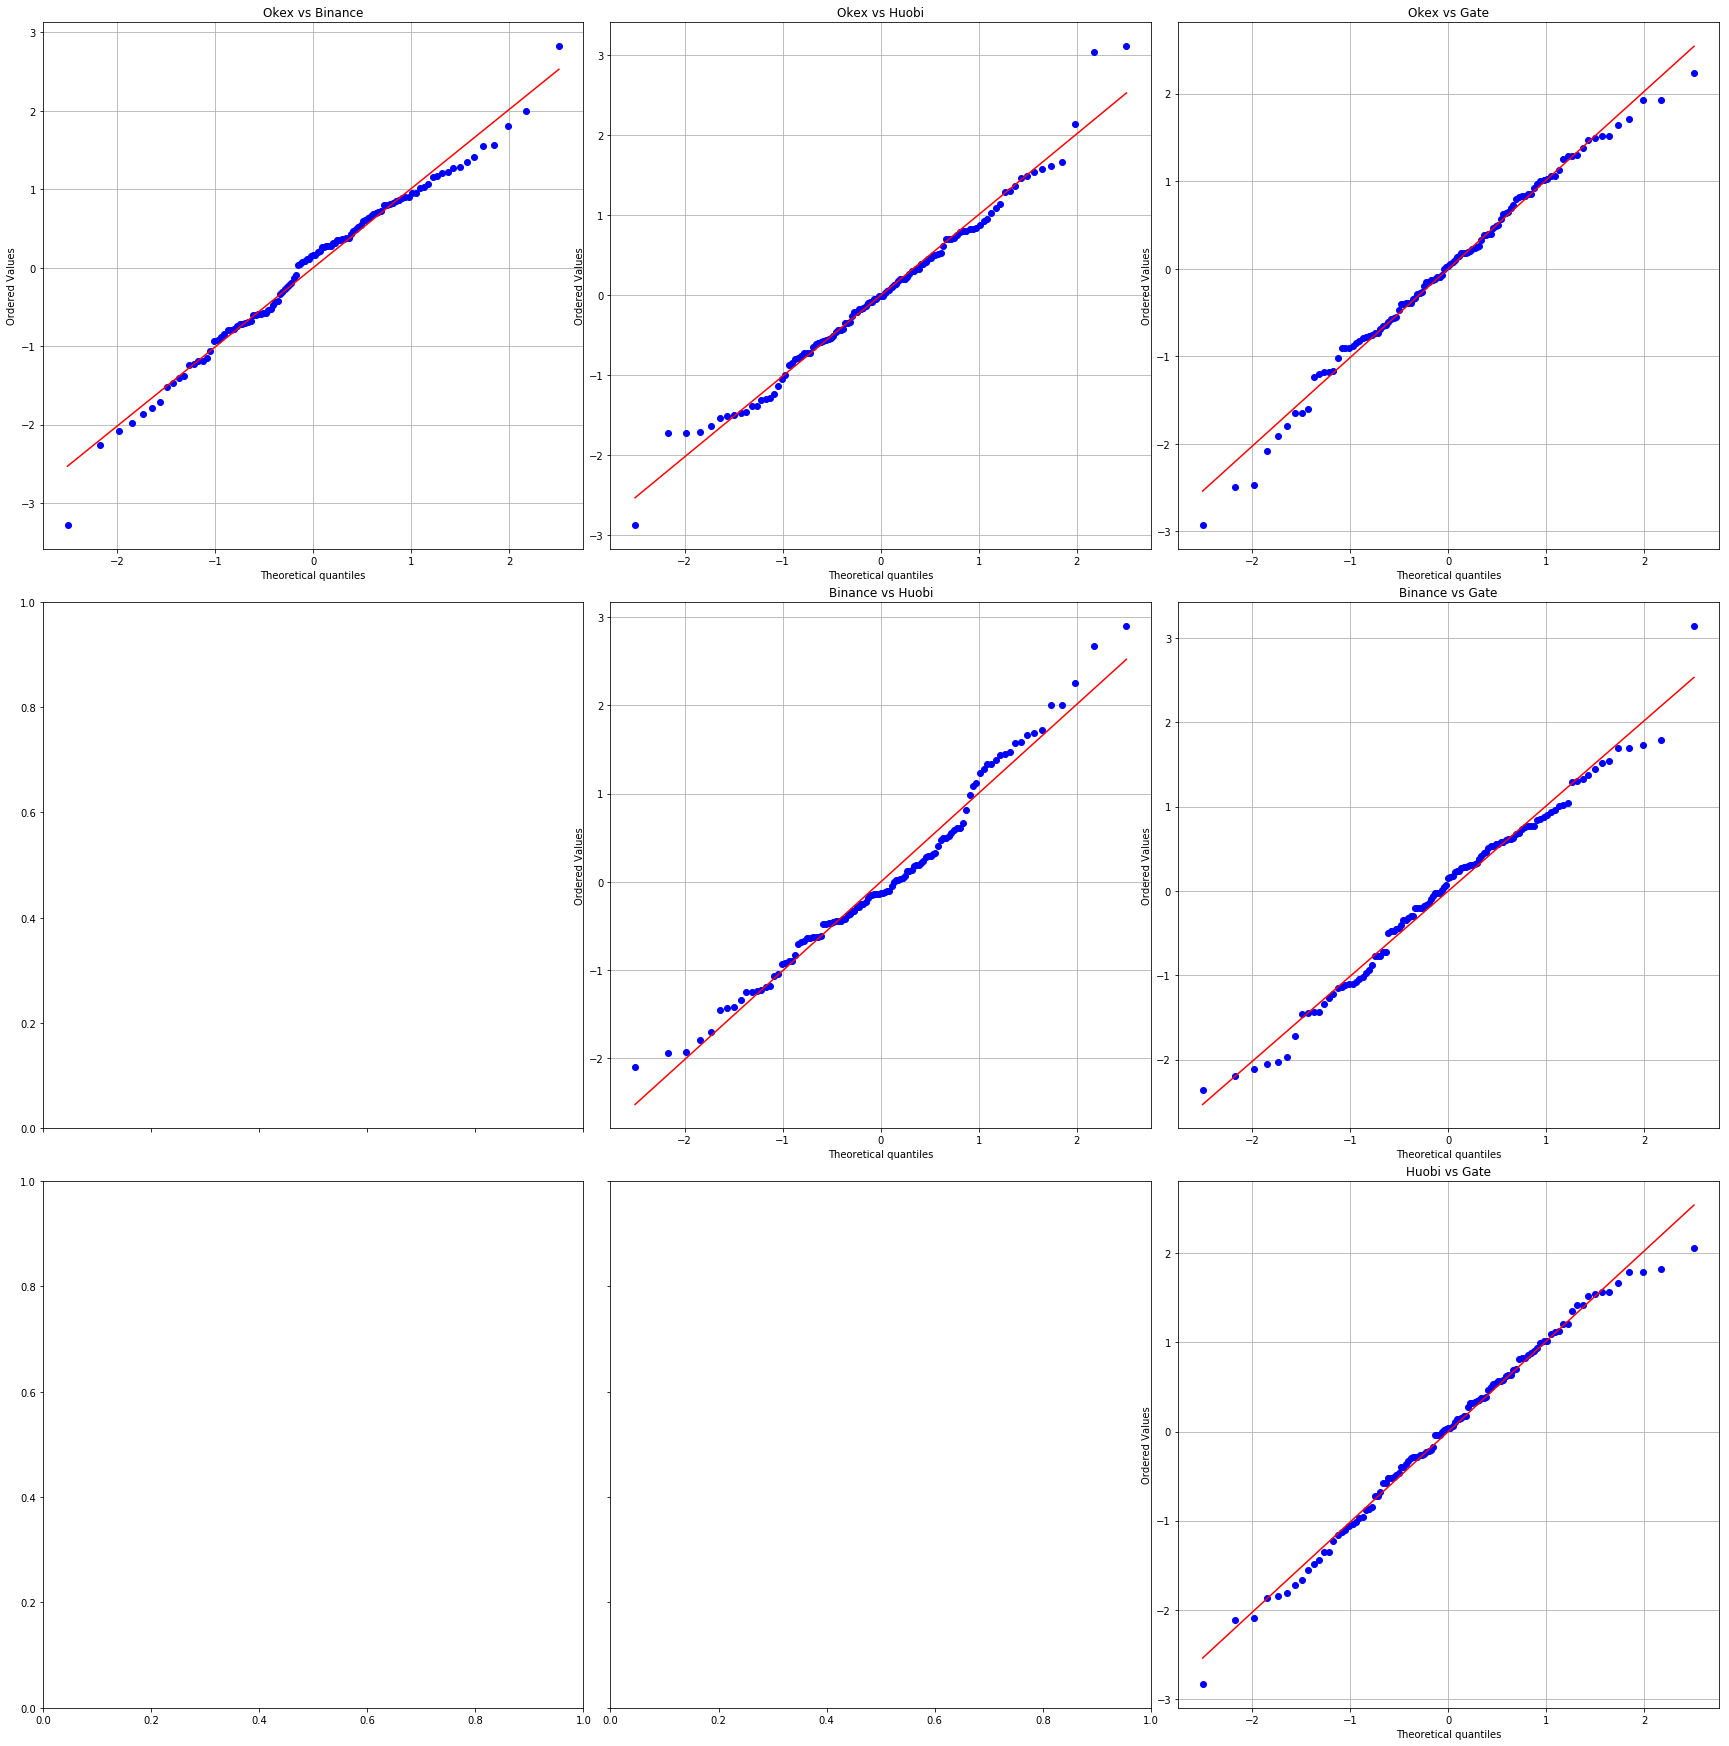

In [14]:
# 残差分析
# 假设检验不同市场的BTC的币价的差值符合正态分布（波动率正态）
import numpy as np 
import pylab 
import scipy.stats as stats

    
%matplotlib inline

plt.figure()
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(24,24))
fig.tight_layout() #调整整体空白
plt.subplots_adjust(wspace =0.05, hspace =0.1) #调整子图间距

plt.subplot(3, 3, 1)
measurements = pd.DataFrame(okexSample["close"] - binanceSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
stats.probplot(measurements['close'], dist="norm", plot=pylab)
plt.title("Okex vs Binance")
plt.grid(True)

plt.subplot(3, 3, 2)
measurements = pd.DataFrame(okexSample["close"] - huobiSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
stats.probplot(measurements['close'], dist="norm", plot=pylab)
plt.title("Okex vs Huobi")
plt.grid(True)

plt.subplot(3, 3, 3)
measurements = pd.DataFrame(okexSample["close"] - gateSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
stats.probplot(measurements['close'], dist="norm", plot=pylab)
plt.title("Okex vs Gate")
plt.grid(True)

plt.subplot(3, 3, 5)
measurements = pd.DataFrame(binanceSample["close"] - huobiSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
stats.probplot(measurements['close'], dist="norm", plot=pylab)
plt.title("Binance vs Huobi")
plt.grid(True)

plt.subplot(3, 3, 6)
measurements = pd.DataFrame(binanceSample["close"] - gateSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
stats.probplot(measurements['close'], dist="norm", plot=pylab)
plt.title("Binance vs Gate")
plt.grid(True)

plt.subplot(3, 3, 9)
measurements = pd.DataFrame(huobiSample["close"] - gateSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
stats.probplot(measurements['close'], dist="norm", plot=pylab)
plt.title("Huobi vs Gate")
plt.grid(True)

pylab.show()
plt.show()

<Figure size 432x288 with 0 Axes>

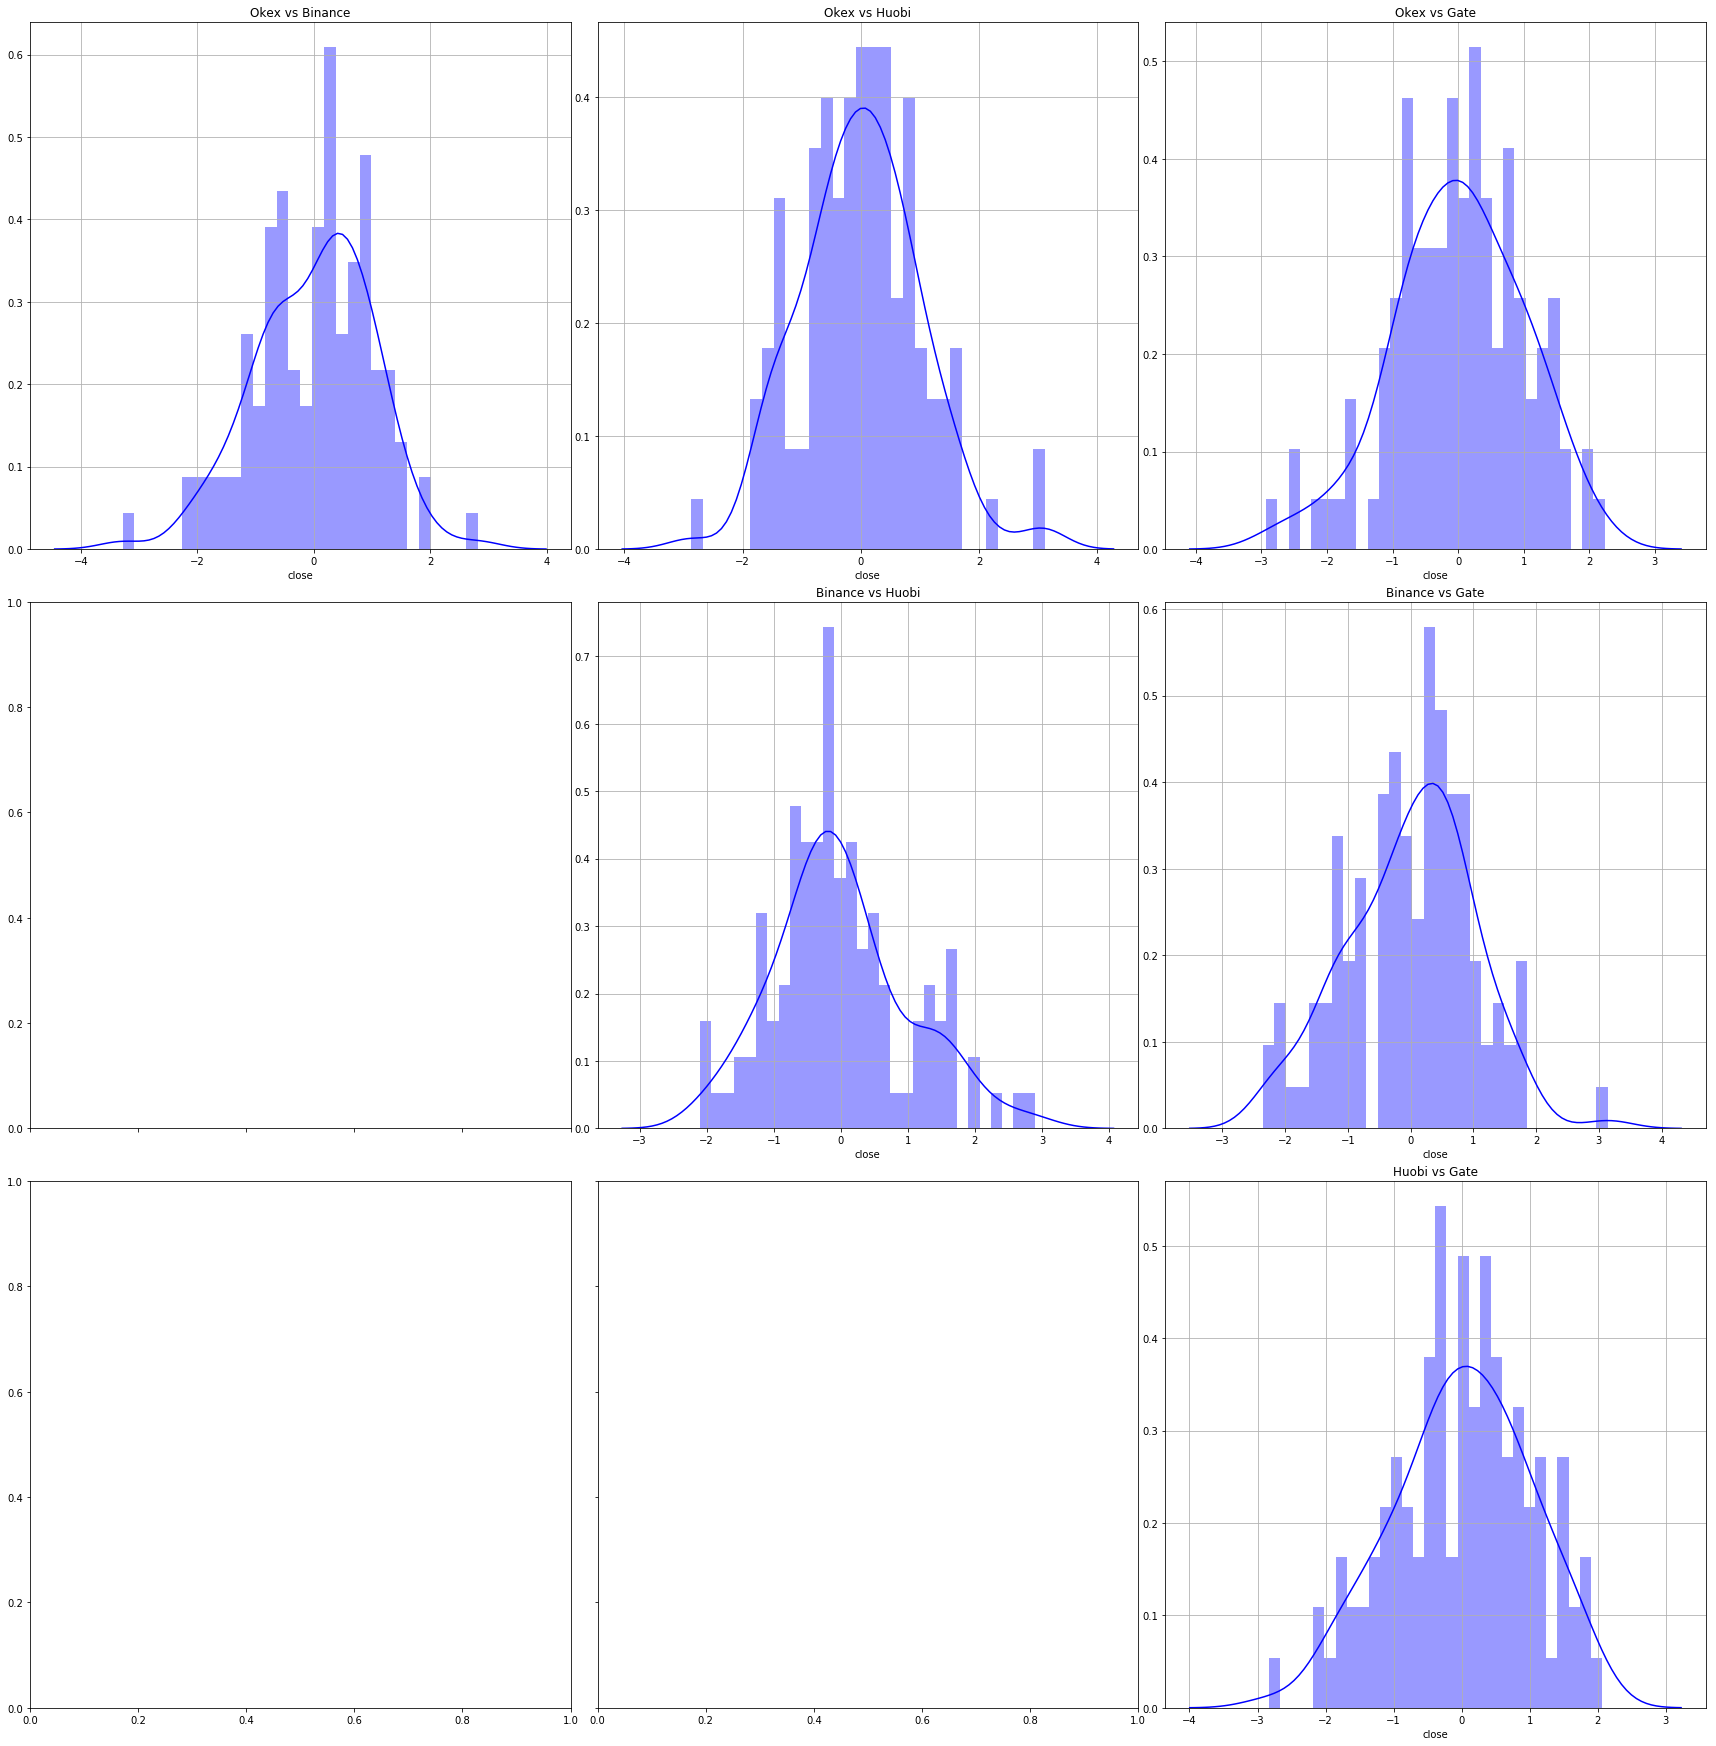

In [15]:
# 残差分析
# 假设检验不同市场的BTC的币价的差值符合正态分布（波动率正态）
import numpy as np 
import pylab 
import seaborn as sns
import scipy.stats as stats

    
%matplotlib inline

plt.figure()
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(24,24))
fig.tight_layout() #调整整体空白
plt.subplots_adjust(wspace =0.05, hspace =0.1) #调整子图间距

plt.subplot(3, 3, 1)
measurements = pd.DataFrame(okexSample["close"] - binanceSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(measurements["close"],color="b",bins=30,kde=True)
plt.title("Okex vs Binance")
plt.grid(True)

plt.subplot(3, 3, 2)
measurements = pd.DataFrame(okexSample["close"] - huobiSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(measurements["close"],color="b",bins=30,kde=True)
plt.title("Okex vs Huobi")
plt.grid(True)

plt.subplot(3, 3, 3)
measurements = pd.DataFrame(okexSample["close"] - gateSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(measurements["close"],color="b",bins=30,kde=True)
plt.title("Okex vs Gate")
plt.grid(True)

plt.subplot(3, 3, 5)
measurements = pd.DataFrame(binanceSample["close"] - huobiSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(measurements["close"],color="b",bins=30,kde=True)
plt.title("Binance vs Huobi")
plt.grid(True)

plt.subplot(3, 3, 6)
measurements = pd.DataFrame(binanceSample["close"] - gateSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(measurements["close"],color="b",bins=30,kde=True)
plt.title("Binance vs Gate")
plt.grid(True)

plt.subplot(3, 3, 9)
measurements = pd.DataFrame(huobiSample["close"] - gateSample["close"])
measurements = measurements.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(measurements["close"],color="b",bins=30,kde=True)
plt.title("Huobi vs Gate")
plt.grid(True)

plt.show()
